<a href="https://colab.research.google.com/github/Bruceirshaidat/Bitcoin_forecasting_using_LSTM/blob/main/Bitcoin_forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from  keras import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout ,LSTM
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
df=pd.read_csv('bitcoin.csv')
df.head()

,timestamp,open,high,low,close,volume
0,2020-03-03 17:00:00,8698.95,8708.00,8683.19,8685.09,669.586017
1,2020-03-03 17:15:00,8684.93,8726.81,8683.19,8713.31,599.507724
2,2020-03-03 17:30:00,8712.94,8732.30,8710.24,8720.95,334.815468
3,2020-03-03 17:45:00,8721.02,8732.18,8707.00,8718.99,426.544158
4,2020-03-03 18:00:00,8718.99,8726.53,8694.05,8713.56,463.525150


In [20]:
df["timestamp"]=pd.to_datetime(df["timestamp"])
df.sort_values("timestamp",inplace=True,ascending=True)
df.reset_index(inplace=True,drop=True)
df.head()

,timestamp,open,high,low,close,volume
0,2020-03-03 17:00:00,8698.95,8708.00,8683.19,8685.09,669.586017
1,2020-03-03 17:15:00,8684.93,8726.81,8683.19,8713.31,599.507724
2,2020-03-03 17:30:00,8712.94,8732.30,8710.24,8720.95,334.815468
3,2020-03-03 17:45:00,8721.02,8732.18,8707.00,8718.99,426.544158
4,2020-03-03 18:00:00,8718.99,8726.53,8694.05,8713.56,463.525150


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175074 entries, 0 to 175073
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  175074 non-null  datetime64[ns]
 1   open       175074 non-null  float64       
 2   high       175074 non-null  float64       
 3   low        175074 non-null  float64       
 4   close      175074 non-null  float64       
 5   volume     175074 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 8.0 MB


In [22]:
df.describe()

,timestamp,open,high,low,close,volume
count,175074,175074.000000,175074.000000,175074.000000,175074.000000,175074.000000
mean,2022-09-02 14:33:20.167928832,39255.377279,39339.762927,39167.948323,39255.847647,871.196027
min,2020-03-03 17:00:00,3888.650000,4240.750000,3782.130000,3882.220000,0.000000
25%,2021-06-03 14:48:45,21117.195000,21168.692500,21064.640000,21117.222500,237.350403
50%,2022-09-02 19:22:30,35261.650000,35377.725000,35119.605000,35261.650000,448.272451
75%,2023-12-02 18:41:15,56070.417500,56251.750000,55872.007500,56070.515000,952.990531
max,2025-03-02 16:45:00,108975.430000,109588.000000,108185.270000,108975.420000,40371.405060
std,NaN,23178.290606,23222.272185,23132.288301,23178.507653,1292.997699


###Checking Duplicates

In [23]:
df.duplicated().sum()

np.int64(0)

###Checking Missing Values

In [24]:
df.isnull().sum()

,0
timestamp,0
open,0
high,0
low,0
close,0
volume,0


###Visualizing  Data

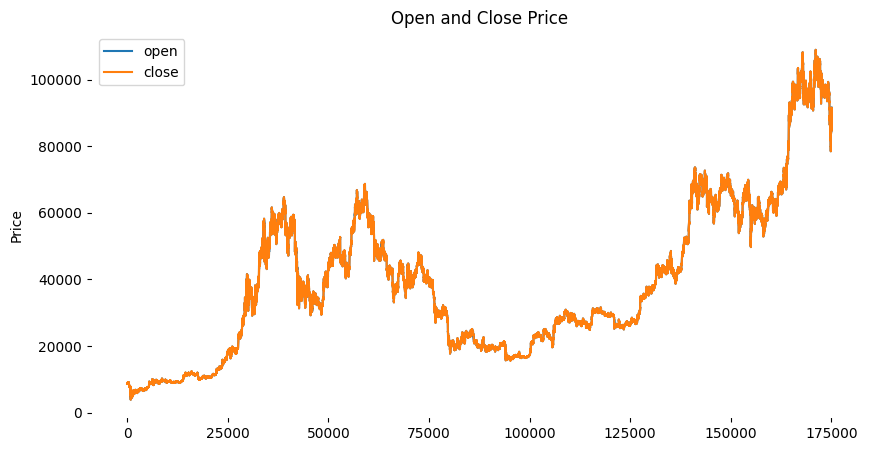

In [25]:
plt.figure(figsize=(10,5))
df["open"].plot()
df["close"].plot()
plt.xlabel(None)
plt.ylabel("Price")
plt.title("Open and Close Price")
plt.legend()

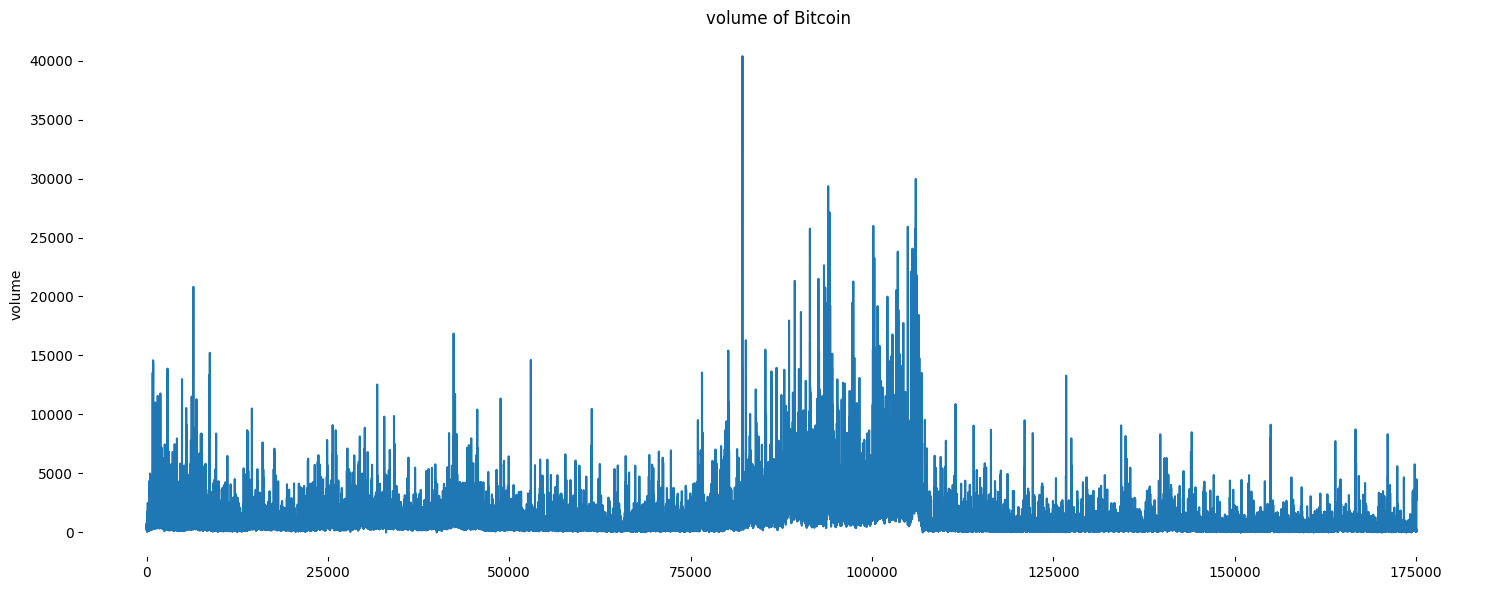

In [26]:
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title("volume of Bitcoin ")
plt.tight_layout()
plt.show()

###Choosing Prediction Colum

In [27]:
dataset = df["close"]
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(175074, 1)

###Normalizing Data

In [28]:
scaler=MinMaxScaler()
scaler.fit(df.close.values.reshape(-1,1))

MinMaxScaler()

###Splitting Data to Training & Test Sets

In [29]:
test_size=df[df["timestamp"]>="2025-01-01"].shape[0]
train_size=df.shape[0]-test_size
print("Train Size:",train_size)
print("Test Size:",test_size)

Train Size: 169246
Test Size: 5828


###Data Training and Test Sets Plot

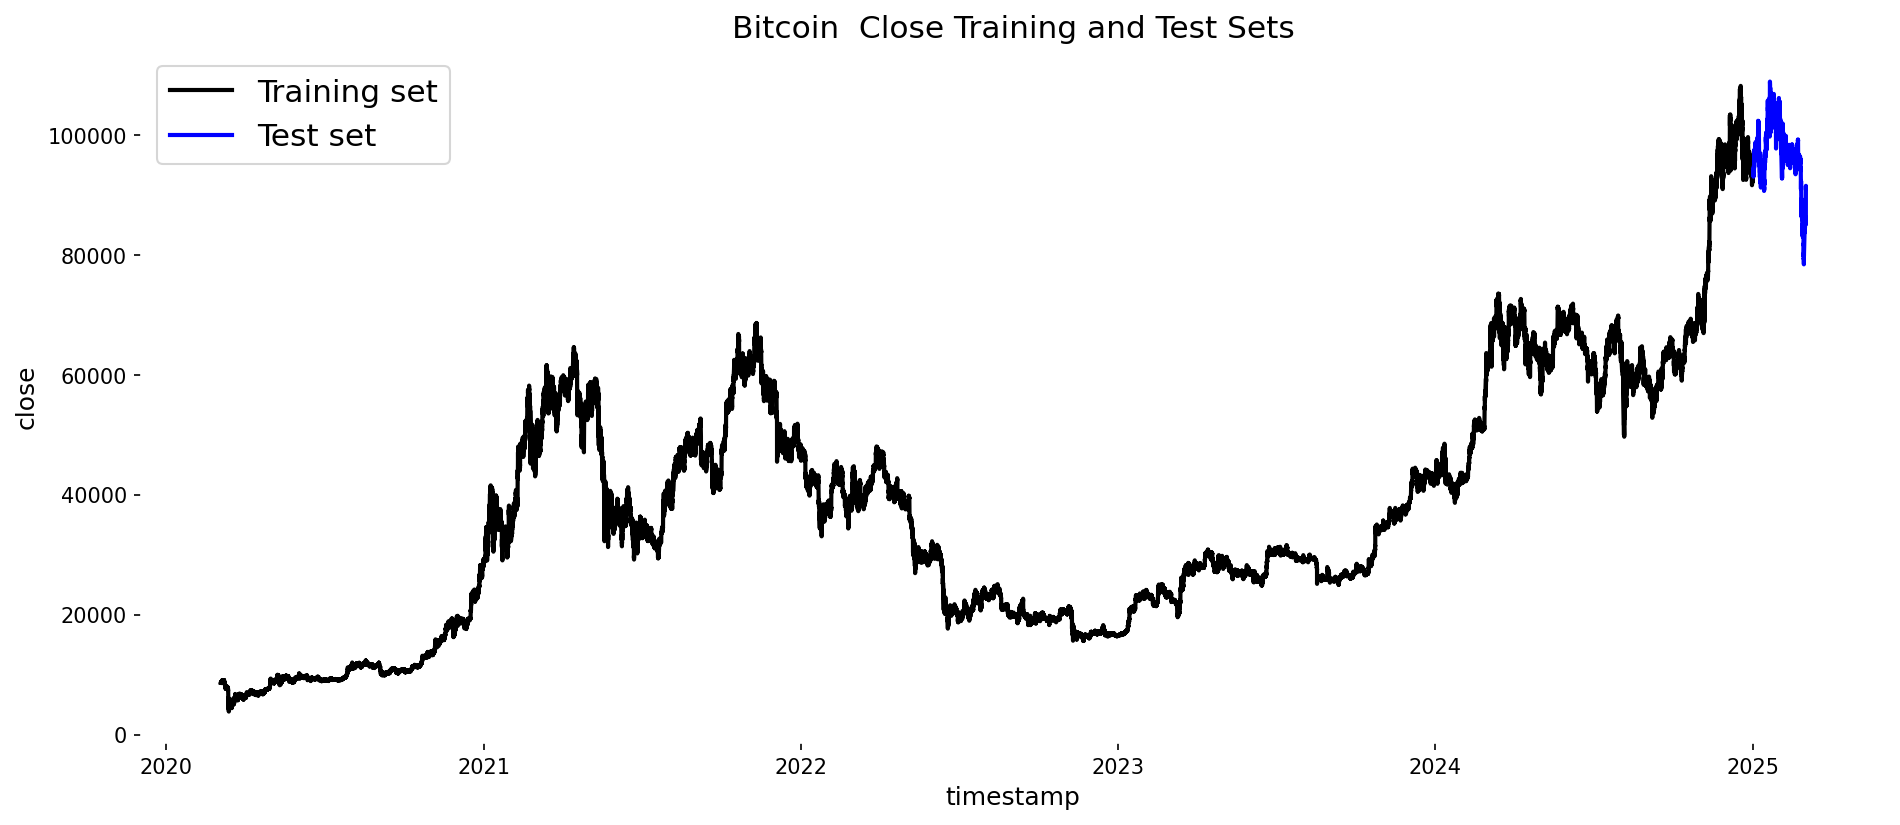

In [30]:
plt.figure(figsize=(15, 6), dpi=150)

plt.rc('axes',edgecolor='white')
plt.plot(df.timestamp[:-test_size], df.close[:-test_size], color='black', lw=2)
plt.plot(df.timestamp[-test_size:], df.close[-test_size:], color='blue', lw=2)
plt.title('Bitcoin  Close Training and Test Sets', fontsize=15)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('close', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})

plt.show()


In [31]:
window_size = 60

In [32]:
# test_timestamp=df.close[-test_size-60:]
# test_timestamp=scaler.transform(test_timestamp.values.reshape(-1,1))
# test_timestamp.shape
# x_test=[]
# y_test=[]
# for i in range(window_size,len(test_timestamp)):
#   x_test.append(test_timestamp[i-window_size:i,0])
#   y_test.append(test_timestamp[i,0])

##Converting Data to Numpy Arrays


In [36]:
train_data=df.close[:train_size]
train_data=scaler.transform(train_data.values.reshape(-1,1))
x_train=[]
y_train=[]
for i in range(window_size,len(train_data)):
  x_train.append(train_data[i-window_size:i,0])
  y_train.append(train_data[i,0])

# Prepare test data
test_data = df.close[-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))
x_test=[]
y_test=[]
for i in range(window_size,len(test_data)):
  x_test.append(test_data[i-window_size:i,0])
  y_test.append(test_data[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [37]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))


In [38]:
print('x_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('x_test Shape:  ', x_test.shape)
print('y_test Shape:  ', y_test.shape)


x_train Shape:  (169186, 60, 1)
y_train Shape:  (169186, 1)
x_test Shape:   (5828, 60, 1)
y_test Shape:   (5828, 1)


####Creating an LSTM model

In [61]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(32, activation='relu')),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 60, 32)         │         2,080 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,913 (495.75 KB)

 Trainable params: 126,913 (495.75 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 8.3527e-04 - mean_absolute_error: 0.0073 - val_loss: 3.0438e-05 - val_mean_absolute_error: 0.0040
Epoch 2/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 1.0690e-05 - mean_absolute_error: 0.0022 - val_loss: 5.7041e-05 - val_mean_absolute_error: 0.0069
Epoch 3/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - loss: 1.0752e-05 - mean_absolute_error: 0.0023 - val_loss: 2.1197e-05 - val_mean_absolute_error: 0.0039
Epoch 4/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 7.7065e-06 - mean_absolute_error: 0.0019 - val_loss: 1.5761e-05 - val_mean_absolute_error: 0.0030
Epoch 5/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 6.0689e-06 - mean_absolute_error: 0.0017 - val_loss: 6.1939e-06 - val_mean_absolute_error: 0.0018
Epoch 6/100
2380/2380 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 5.0051e-06 - mean_absolute_error: 0.0016 - val_loss: 5.6083e-06 - val_mean_absolute_error: 0.0017
Epoch 7/100
2380/2380 ━━

In [63]:
result = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7961e-05 - mean_absolute_error: 0.0056
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [3.7130444979993626e-05, 0.005428842268884182]
Test MAPE: 0.0060172869487944295
Test Accuracy: 0.9939827130512056


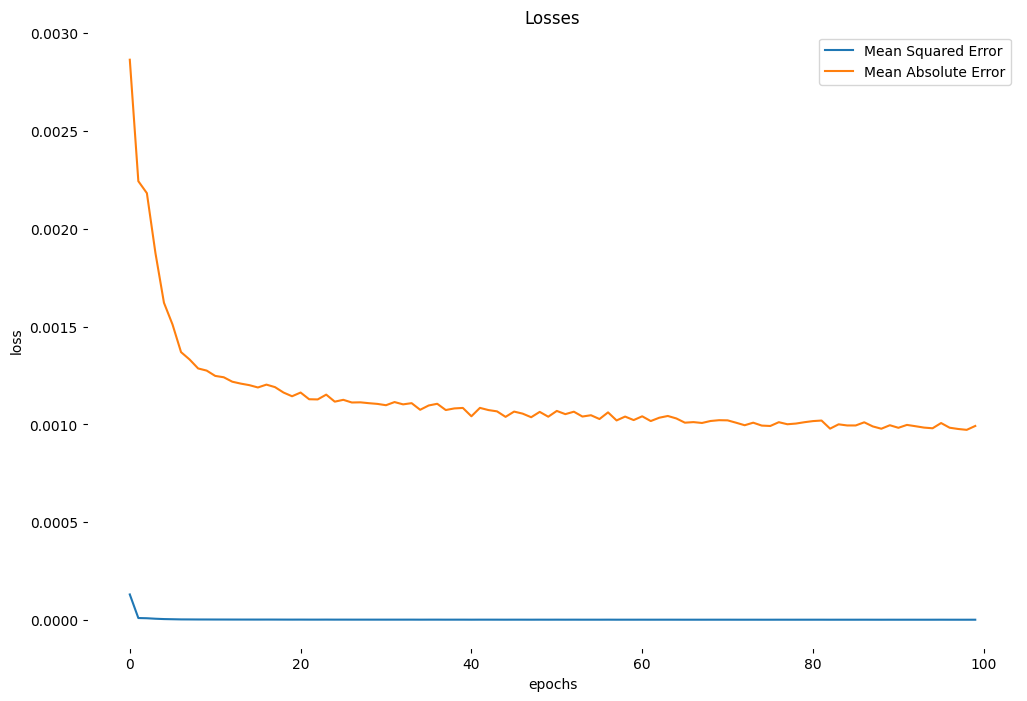

In [65]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [70]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

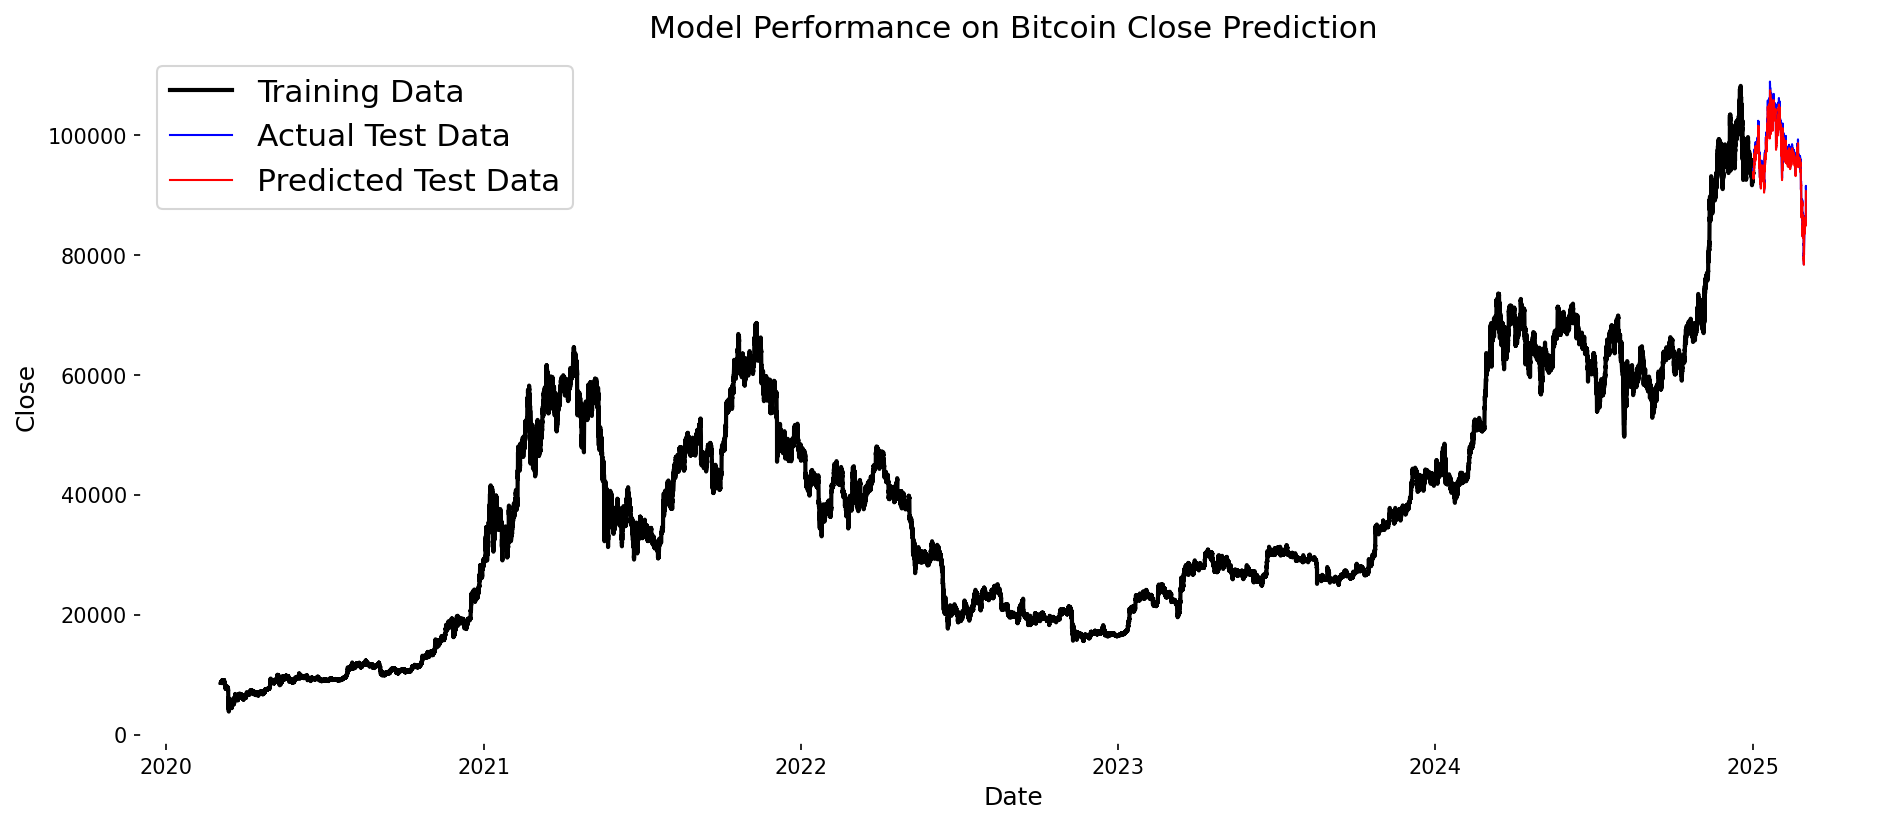

In [71]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'White'
plt.rc('axes',edgecolor='white')
plt.plot(df['timestamp'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['timestamp'].iloc[-test_size:], y_test_true, color='blue', lw=1)
plt.plot(df['timestamp'].iloc[-test_size:], y_test_pred, color='red', lw=1)
plt.title('Model Performance on Bitcoin Close Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


In [72]:
predictions = model.predict(x_test)

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [73]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(5828, 1)

In [74]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

np.float64(548.46)

In [75]:
preds_acts = pd.DataFrame(data={"timestamp":df['timestamp'].iloc[-test_size:] , 'Predictions':predictions.flatten(), 'Actuals':y_test.flatten() , })
preds_acts


,timestamp,Predictions,Actuals
169246,2025-01-01 00:00:00,93179.593750,93656.18
169247,2025-01-01 00:15:00,93248.335938,93761.90
169248,2025-01-01 00:30:00,93333.507812,93885.01
169249,2025-01-01 00:45:00,93438.000000,94401.14
169250,2025-01-01 01:00:00,93866.820312,94153.05
...,...,...,...
175069,2025-03-02 15:45:00,87506.710938,87427.99
175070,2025-03-02 16:00:00,87016.398438,88147.51
175071,2025-03-02 16:15:00,87639.945312,88960.00
175072,2025-03-02 16:30:00,88409.820312,91584.99


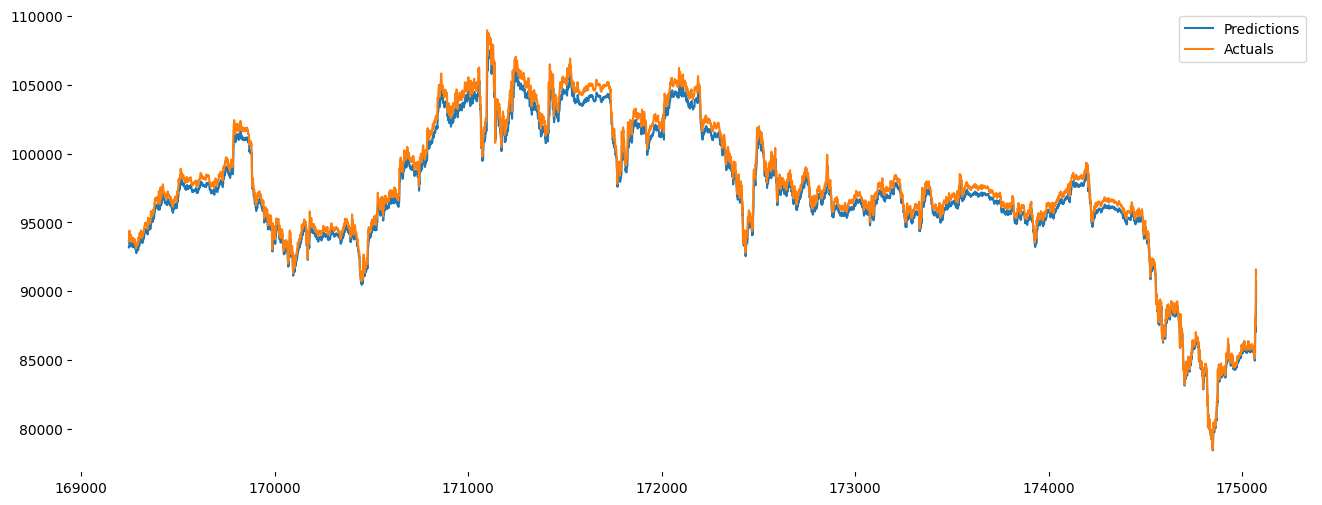

In [76]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [78]:
from datetime import timedelta

future = 30
forecast = []
Xin = scaler.transform(df.close.values[-30:].reshape(-1, 1)).reshape(1, 30, 1)
time = []


last_date = pd.to_datetime(df['timestamp'].iloc[-1])

for i in range(future):

    out = model.predict(Xin, verbose=0)
    forecast.append(out[0, 0])


    out_reshaped = np.reshape(out[0, 0], (1, 1, 1))
    Xin = np.append(Xin[:, 1:, :], out_reshaped, axis=1)

    time.append(last_date + timedelta(days=i+1))


forecasted_output = np.array(forecast).reshape(-1, 1)
forecasted_output = scaler.inverse_transform(forecasted_output)

df_result = pd.DataFrame({
    "Date": time,
    "Forecasted": forecasted_output.flatten()
})

df_result


,Date,Forecasted
0,2025-03-03 16:45:00,90517.046875
1,2025-03-04 16:45:00,89990.437500
2,2025-03-05 16:45:00,89615.085938
3,2025-03-06 16:45:00,89334.718750
4,2025-03-07 16:45:00,89107.296875
5,2025-03-08 16:45:00,88907.117188
6,2025-03-09 16:45:00,88719.218750
7,2025-03-10 16:45:00,88535.945312
8,2025-03-11 16:45:00,88354.101562
9,2025-03-12 16:45:00,88172.781250


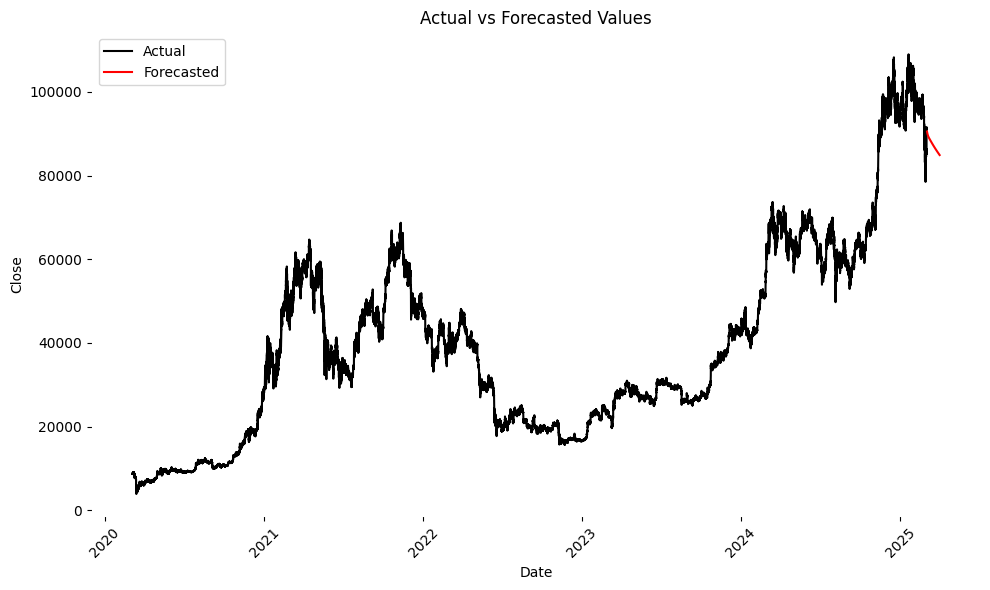

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['close'], label='Actual', color='black')

plt.plot(df_result['Date'], df_result['Forecasted'], label='Forecasted', color='red')

plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
model.save('my_model.h5')